## Does the air pollution of a country have a direct influence on the annual temperature change?

<p align="center">
<img src="./img/DALL·E 2023-01-23 09.34.25 - air pollution temperature rising pencil drawing.png" alt="Getting started" width="520" height="420" />
<p align="center"><cite>DALL-E - https://labs.openai.com/s/RSwBxy06nQrqfD2dtYaEW9sS</cite></p>
</p>

### 1. Business Understanding:
We all know that air pollution is a factor in climate change. What we also know is that this is a global problem. But could it also be that the emissions of a country could already have a direct influence on the temperature change of that country?

Datasets:
- Community Emissions Data System (CEDS)
- FAOSTAT Temperature Change


<cite>Data Sources</cite>

<cite>CEDS-Data: https://ourworldindata.org/explorers/air-pollution</cite>

<cite>FAOSTAT-Temperature-Data: https://www.fao.org/faostat/en/#data/ET</cite>

### 2. Data Understanding

In [101]:
# basic imports
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn
import pandas as pd
import os
import plotly
import plotly.express as px

# base path
system_user = os.getenv('USER')
base_path = "/home/" + system_user + "/DEV/Demos/ppyds/ppyds_project/data"

#### 2.1 Data Understanding - Emmisions data (CEDS)

In [102]:
# load emmisions data
df_emmisions =  pd.read_csv(base_path+"/air-pollution_2019.csv", sep=',')

In [103]:
df_emmisions.sample(3)

Nitrogen oxide (NOx)  Sulphur dioxide (SO₂)  Carbon monoxide (CO)  \
29388            870.826600            1859.591349         325242.182382   
9967              48.590051            2379.672665          44402.667659   
38158             32.775166              63.421711          13128.780424   

       Organic carbon (OC)        NMVOCs  Black carbon (BC)  Ammonia (NH₃)  \
29388         13303.393495  30223.179887        3589.252406   18808.965241   
9967           1689.647682   5746.794527         151.346485    8186.210853   
38158           552.509971   2334.357006          49.151477    2371.059206   

         Entity  Year  
29388     Nepal  1868  
9967    Croatia  1852  
38158  Slovenia  1823

In [104]:
df_emmisions.info()
print("shape:", df_emmisions.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47535 entries, 0 to 47534
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nitrogen oxide (NOx)   47535 non-null  float64
 1   Sulphur dioxide (SO₂)  47535 non-null  float64
 2   Carbon monoxide (CO)   47535 non-null  float64
 3   Organic carbon (OC)    47535 non-null  float64
 4   NMVOCs                 47535 non-null  float64
 5   Black carbon (BC)      47535 non-null  float64
 6   Ammonia (NH₃)          47535 non-null  float64
 7   Entity                 47535 non-null  object 
 8   Year                   47535 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 3.3+ MB
shape: (47535, 9)


In [105]:
df_emmisions.describe()

Nitrogen oxide (NOx)  Sulphur dioxide (SO₂)  Carbon monoxide (CO)  \
count          4.753500e+04           4.753500e+04          4.753500e+04   
mean           5.260436e+05           7.992584e+05          5.173733e+06   
std            4.332972e+06           5.743331e+06          3.059404e+07   
min            0.000000e+00           0.000000e+00          0.000000e+00   
25%            1.548467e+02           6.235476e+01          1.469565e+04   
50%            1.689596e+03           8.450006e+02          1.163538e+05   
75%            2.899340e+04           3.199098e+04          6.540220e+05   
max            1.095663e+08           1.335263e+08          6.616236e+08   

       Organic carbon (OC)        NMVOCs  Black carbon (BC)  Ammonia (NH₃)  \
count         4.753500e+04  4.753500e+04       4.753500e+04   4.753500e+04   
mean          1.302651e+05  8.868047e+05       4.678637e+04   3.417240e+05   
std           6.744725e+05  5.927514e+06       2.771701e+05   2.250404e+06   
min           0.000000e+00  0.000000e+00       0.000000e+00   0.000000e+00   
25%           6.073753e+02  2.245105e+03       1.514704e+02   1.399557e+03   
50%           4.364754e+03  1.728262e+04       1.065555e+03   9.817929e+03   
75%           2.160645e+04  1.139918e+05       6.333218e+03   5.276752e+04   
max           1.401013e+07  1.468331e+08       6.314146e+06   6.142059e+07   

               Year  
count  47535.000000  
mean    1909.436731  
std       66.777467  
min     1750.000000  
25%     1853.000000  
50%     1912.000000  
75%     1968.000000  
max     2019.000000

1. Nitrogen oxides (NOx) - gases consisting of nitrogen and oxygen, cause smog and acid rain, are emitted by vehicles and industrial processes.
2. Sulphur dioxide (SO2) - a colourless gas, causes acid rain, emitted from burning fossil fuels, especially coal.
3. Carbon monoxide (CO) - a colourless and odourless gas, toxic to humans, emitted from vehicles and the incomplete combustion of fossil fuels.
4. Organic carbon (OC) - a form of carbon, major component of particulate matter, emitted from vehicles and industrial processes.
5. NMVOCs (Non-Methane Volatile Organic Compounds) - a group of organic gases that contribute to the formation of smog and particulate matter and are emitted by industrial processes, vehicles and solvents.
6. Black carbon (BC) - a type of particulate matter composed mainly of carbon and produced by the incomplete combustion of fossil fuels, biofuels and biomass.
7. Ammonia (NH3) - colourless, strong-smelling gas that contributes to particulate matter and acid rain and is released by agricultural activities, especially livestock and fertilisers, industry and waste management.

<cite>(Hoesly et al, Historical (1750–2014) anthropogenic emissions of reactive gases and aerosols from the Community Emissions Data System (CEDS). Geosci. Model Dev. 11, 369-408, 2018a.)</cite>

<AxesSubplot:>

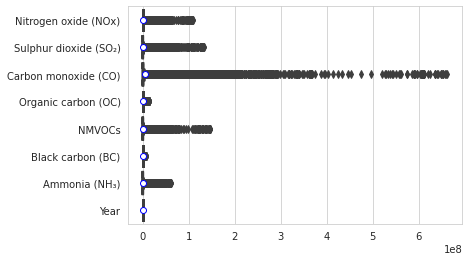

In [106]:
sn.boxplot(data=df_emmisions, orient="h", palette="Set1", linewidth=2.5, notch=True,  showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"blue"})

Lets use the zscore to see the scattering of the column values in the dataframe

In [107]:
from scipy.stats import zscore

In [108]:
def abs_zscore(x):
    return np.abs(zscore(x))

df_numeric = df_emmisions.select_dtypes(include=np.number)

df_zscore = df_numeric.apply(abs_zscore)

In [109]:
threshold = 5
outliers = df_emmisions[(df_zscore>threshold).any(axis='columns')]
none_outliers = df_emmisions[~(df_zscore>threshold).any(axis='columns')]

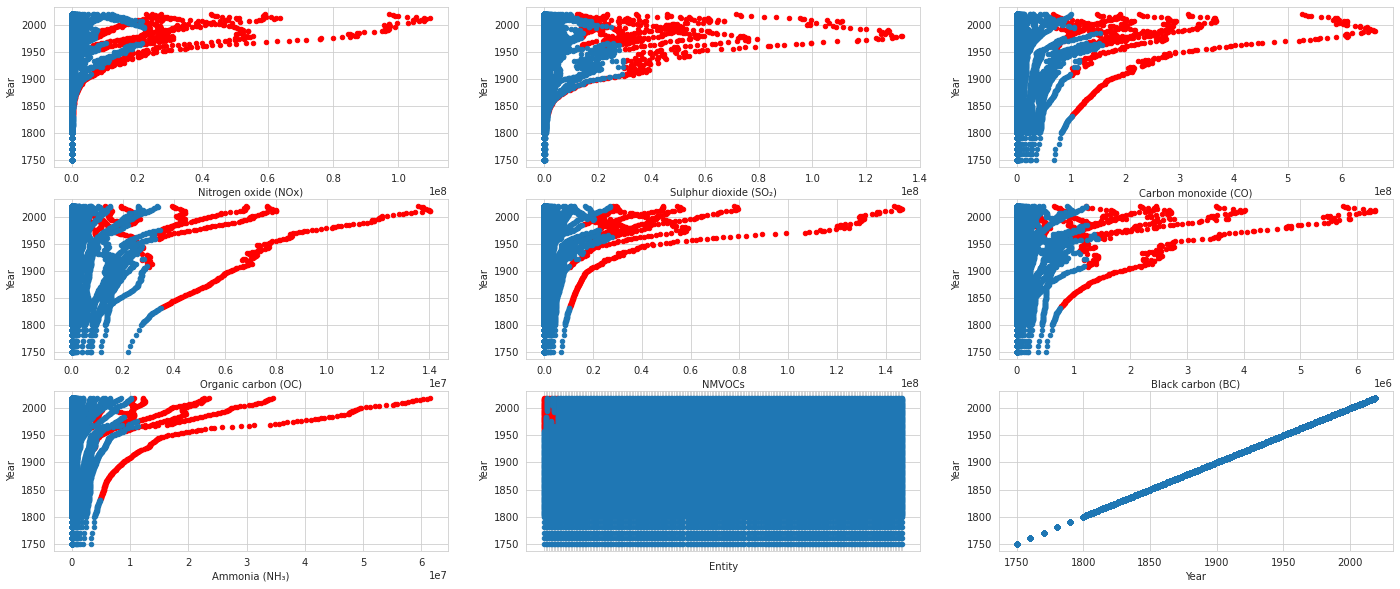

In [110]:

def plot_outliers(outliers, none_outliers, number_of_cols, number_of_rows, figsize=(24, 10)):
    fig, axes = plt.subplots(number_of_cols, number_of_rows, figsize=figsize)
    axe = axes.ravel()

    # assign the plot to each subplot in axe
    for i, c in enumerate(outliers.columns):
        outliers[[c, 'Year']].plot(kind='scatter', x=c, y='Year', ax=axe[i], color='red')
        none_outliers[[c, 'Year']].plot(kind='scatter', x=c, y='Year', ax=axe[i])
        if c == 'Entity':
            axe[i].set(xticklabels=[])

plot_outliers(outliers, none_outliers, 3, 3, (24, 10))

In [111]:
# get outlier values of Entity
outliers['Entity'].unique()

array(['Asia', 'China', 'Europe', 'High-income countries',
       'Lower-middle-income countries', 'North America', 'United States',
       'Upper-middle-income countries', 'World'], dtype=object)

As we can see, the dataset also contains calculations for complete continents and grouped countries.

We only want to research on a country level. Thats why these values can be removed.

In [112]:
none_countries = ['Asia', 'Africa', 'Europe', 'High-income countries',
       'Lower-middle-income countries', 'North America', 'South America',
       'Upper-middle-income countries', 'World']

df_emmisions = df_emmisions[~df_emmisions['Entity'].isin(none_countries)]

In [113]:
plotly.offline.init_notebook_mode(connected=True)
px.choropleth(data_frame=df_emmisions,
 locationmode='country names',locations='Entity', color='Carbon monoxide (CO)',animation_frame='Year',
  title='Carbon emission by country and year',color_continuous_scale=plotly.express.colors.sequential.Plasma,range_color=(100, 0))

<AxesSubplot:title={'center':'Emissions in the USA'}, xlabel='Year', ylabel='Emissions in million tons'>

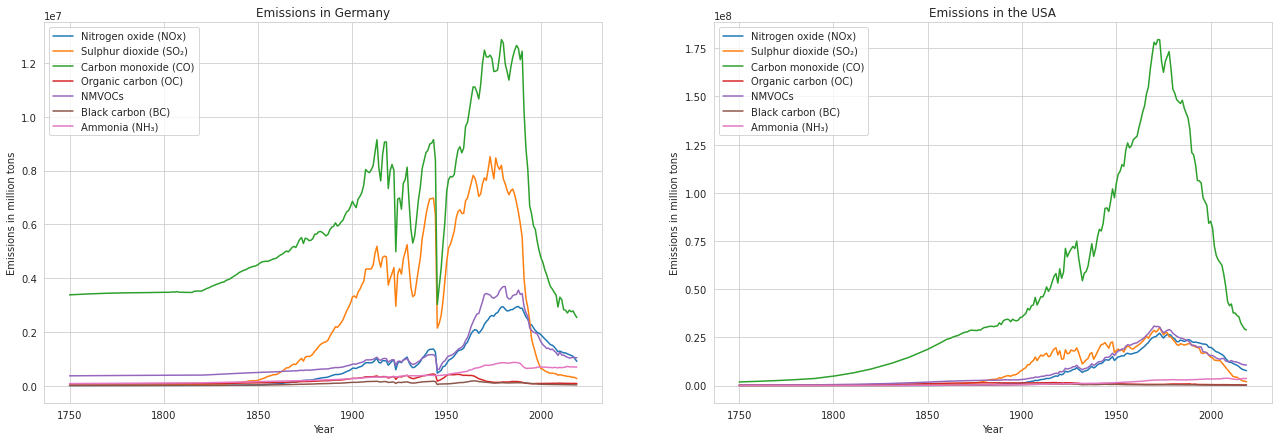

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(22, 7))

df_emmisions[df_emmisions['Entity']=='Germany'].plot(x='Year', ylabel="Emissions in million tons", title='Emissions in Germany', ax=axes[0])
df_emmisions[df_emmisions['Entity']=='United States'].plot(x='Year', ylabel="Emissions in million tons", title='Emissions in the USA', ax=axes[1])

#### 2.2 Data Understanding - Temperature data (FAOSTAT)

In [115]:
# load emmisions data
df_temperature =  pd.read_csv(base_path+"/temperature_data_2019.csv", sep=',')

In [116]:
df_temperature.sample(3)

Domain Code              Domain  Area Code (M49)            Area  \
22025          ET  Temperature change              690      Seychelles   
4271           ET  Temperature change              136  Cayman Islands   
8703           ET  Temperature change              234   Faroe Islands   

       Element Code             Element  Months Code               Months  \
22025          7271  Temperature change         7020  Meteorological year   
4271           7271  Temperature change         7020  Meteorological year   
8703           6078  Standard Deviation         7020  Meteorological year   

       Year Code  Year Unit  Value Flag Flag Description  
22025       1966  1966   °C  0.070    E  Estimated value  
4271        1966  1966   °C -0.238    E  Estimated value  
8703        2011  2011   °C  0.469    E  Estimated value

In [117]:
df_temperature.info()
print("shape:", df_temperature.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27528 entries, 0 to 27527
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       27528 non-null  object 
 1   Domain            27528 non-null  object 
 2   Area Code (M49)   27528 non-null  int64  
 3   Area              27528 non-null  object 
 4   Element Code      27528 non-null  int64  
 5   Element           27528 non-null  object 
 6   Months Code       27528 non-null  int64  
 7   Months            27528 non-null  object 
 8   Year Code         27528 non-null  int64  
 9   Year              27528 non-null  int64  
 10  Unit              27528 non-null  object 
 11  Value             25416 non-null  float64
 12  Flag              27528 non-null  object 
 13  Flag Description  27528 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 2.9+ MB
shape: (27528, 14)


"The FAOSTAT Temperature Change domain disseminates statistics of mean surface temperature change by country, with annual updates. Corresponding to the period 1951–1980"

<cite>https://www.fao.org/faostat/en/#data/ET/metadata</cite>

In [118]:
def temperature_df_preperation(df):
    df = df.drop(df[df_temperature.Element == "Standard Deviation"].index)
    df = df.rename(columns={'Value': 'Temperature Change'})
    return df

df_temperature = temperature_df_preperation(df_temperature)
df_temperature.describe()

Area Code (M49)  Element Code  Months Code     Year Code          Year  \
count     13764.000000       13764.0      13764.0  13764.000000  13764.000000   
mean        434.256103        7271.0       7020.0   1991.821854   1991.821854   
std         254.729597           0.0          0.0     17.615063     17.615063   
min           4.000000        7271.0       7020.0   1961.000000   1961.000000   
25%         212.000000        7271.0       7020.0   1977.000000   1977.000000   
50%         430.000000        7271.0       7020.0   1993.000000   1993.000000   
75%         654.000000        7271.0       7020.0   2007.000000   2007.000000   
max         894.000000        7271.0       7020.0   2021.000000   2021.000000   

       Temperature Change  
count        13248.000000  
mean             0.505521  
std              0.648806  
min             -3.251000  
25%              0.047750  
50%              0.436000  
75%              0.901000  
max              5.327000

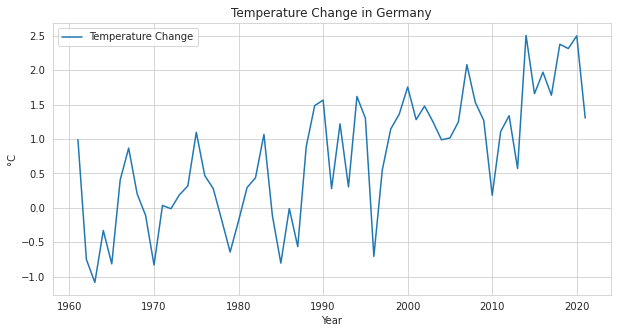

In [119]:
plot = df_temperature[df_temperature['Area']=='Germany'].plot(x='Year', y="Temperature Change", ylabel="°C", figsize=(10, 5), title='Temperature Change in Germany')

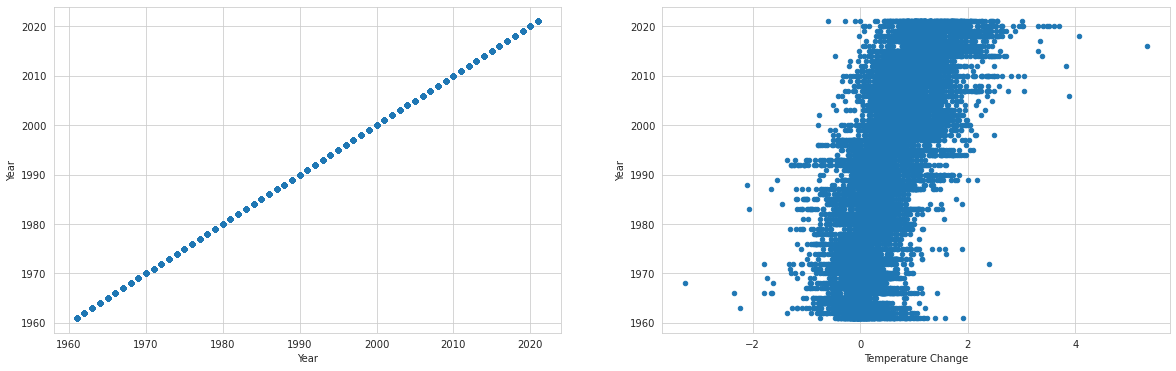

In [120]:
df_temperature_numeric_only = df_temperature.select_dtypes(include=np.number)

df_temperature_zscore = df_temperature_numeric_only.apply(abs_zscore)
threshold = 5
outliers_temperature = df_temperature[(df_temperature_zscore>threshold).any(axis='columns')]
none_outliers_temperature = df_temperature[~(df_temperature_zscore>threshold).any(axis='columns')]

plot_outliers(outliers_temperature[["Year", "Temperature Change"]], none_outliers_temperature[["Year", "Temperature Change"]], 1, 2, (20, 6))

In [121]:
# get top 5 max temperature change outlier
outliers_temperature.sort_values(by=['Temperature Change'], ascending=False).head(5)

Empty DataFrame
Columns: [Domain Code, Domain, Area Code (M49), Area, Element Code, Element, Months Code, Months, Year Code, Year, Unit, Temperature Change, Flag, Flag Description]
Index: []

In [122]:
px.choropleth(data_frame=df_temperature, locationmode='country names', locations='Area',
 color='Temperature Change', animation_frame='Year', title='Annual temperature change per country',
 color_continuous_scale=plotly.express.colors.sequential.Plasma, range_color=(100, 0))

### 3. Data Preparation 

We need to clean columns and rows that are not intresting in both datasets. 

Additionally we want to merge both dataframes for further analysis.

In [123]:
# check for null values in both datasets
print(df_emmisions.isnull().sum())
print(df_temperature[["Year", "Temperature Change", "Area"]].isnull().sum())

# drop null values
df_temperature = df_temperature.dropna()

Nitrogen oxide (NOx)     0
Sulphur dioxide (SO₂)    0
Carbon monoxide (CO)     0
Organic carbon (OC)      0
NMVOCs                   0
Black carbon (BC)        0
Ammonia (NH₃)            0
Entity                   0
Year                     0
dtype: int64
Year                    0
Temperature Change    516
Area                    0
dtype: int64


We want to merge the two dataframes by Year->Year and Entity->Area unfortunaly it looks like not all Entity labels are the same as the Area labels.

In the following cell you can see the non-existing labels in the temperature dataframe, that are missing in the emissions dataframe.
A "difflib" function was used to see the closest matches of missing labels. With this result the temperature dataframe was manually edited to use the same labels as the emission dataframe. But as you can see, not all labels could be found.

In [124]:
# compare Area and Entity in both data sets
import difflib

df_emmisions_countries = df_emmisions.Entity.unique()
df_temperature_countries = df_temperature.Area.unique()

diff_countries = set(df_temperature_countries).difference(set(df_emmisions_countries))

for country in diff_countries:
    print(country, difflib.get_close_matches(country, df_emmisions_countries))
    

Timor-Leste ['Timor']
Türkiye ['Turkey']
Pitcairn []
Yugoslav SFR []
Norfolk Island ['Cook Islands', 'Faeroe Islands', 'Solomon Islands']
Viet Nam ['Vietnam']
Mayotte []
Cocos (Keeling) Islands ['Cook Islands']
China, Macao SAR []
Sudan (former) []
USSR []
Svalbard and Jan Mayen Islands []
French Southern Territories []
Serbia and Montenegro ['Montenegro']
United States of America ['United States', 'United States Virgin Islands']
Holy See []
Pacific Islands Trust Territory []
Midway Island ['Cayman Islands', 'Marshall Islands']
Bolivia (Plurinational State of) []
Democratic People's Republic of Korea ['Democratic Republic of Congo']
French Guyana ['French Guiana', 'French Polynesia', 'Guyana']
Nauru []
Isle of Man []
Belgium-Luxembourg ['Luxembourg']
Faroe Islands ['Faeroe Islands', 'Cook Islands', 'Marshall Islands']
San Marino []
Czechoslovakia ['Czechia', 'Slovakia']
Ethiopia PDR ['Ethiopia']
Tuvalu []
China, Hong Kong SAR ['Hong Kong']
Réunion ['Reunion']
Côte d'Ivoire ["Cote d'Ivo

In [125]:
# read in edited temperature dataframe
df_temperature =  pd.read_csv(base_path+"/temperature_data_2019_country_corrected.csv", sep=',') 
df_temperature = temperature_df_preperation(df_temperature)
df_temperature = df_temperature.dropna()

# merge data sets
df_merged = pd.merge(df_emmisions, df_temperature,  how='inner', left_on=['Entity','Year'], right_on = ['Area','Year'])

# remove unnecessary columns
df_merged = df_merged[['Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂)', 'Carbon monoxide (CO)','Organic carbon (OC)', 'NMVOCs', 'Black carbon (BC)', 'Ammonia (NH₃)', 'Year', 'Temperature Change', 'Entity']]

Let's create a simple linear correlation heatmap. Between the pollution values and the temperature change value. 
The data is currently not grouped by country. 

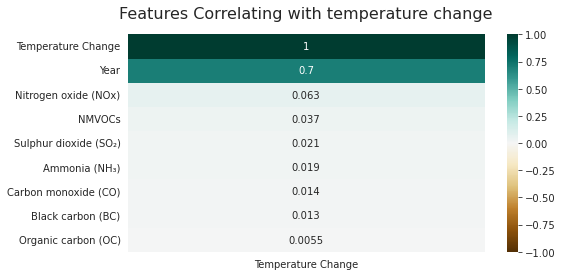

In [126]:
plt.figure(figsize=(8, 4))
heatmap = sn.heatmap(df_merged.corr()[['Temperature Change']].sort_values(by='Temperature Change', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with temperature change', fontdict={'fontsize':16}, pad=16);


Let's try this correlation analysis with data that comes only from the country the emission were produced in. 

<AxesSubplot:title={'center':'Data Germany'}, xlabel='Year'>

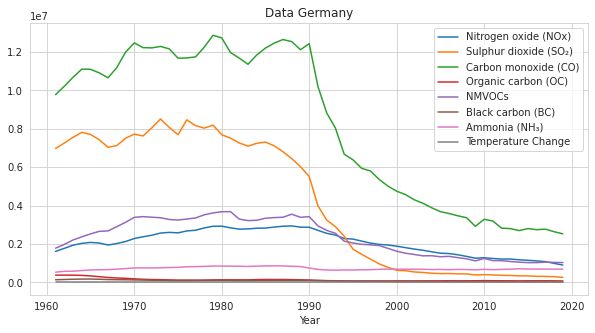

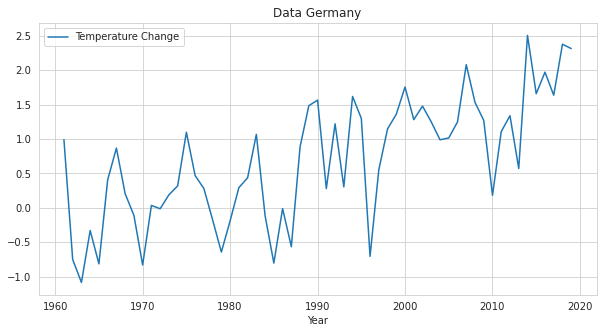

In [127]:

df_merged[df_merged['Entity']=='Germany'].plot(x='Year', figsize=(10, 5), title='Data Germany')
df_merged[df_merged['Entity']=='Germany'].plot(x='Year', y="Temperature Change", figsize=(10, 5), title='Data Germany')

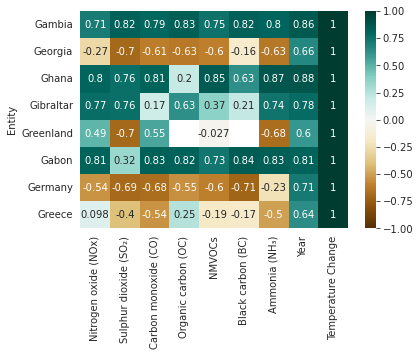

In [128]:
corrs_per_country = df_merged.groupby(['Entity']).corrwith(df_merged['Temperature Change'])
heatmap = sn.heatmap(corrs_per_country.iloc[65:73].sort_values(by='Temperature Change', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [129]:
# define final dataframe for data modeling
df_prepared = df_merged[['Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂)', 'Carbon monoxide (CO)','Organic carbon (OC)', 'NMVOCs', 'Black carbon (BC)', 'Ammonia (NH₃)', 'Year', 'Entity', 'Temperature Change']]
df_prepared  = df_prepared.sort_values(['Entity', 'Year'])

In [130]:
# prepare a model (58 Years of data per country) and leave out 2019 for later evaluation
df_regression_germany = df_prepared[(df_prepared['Entity']=='Germany') & (df_prepared['Year']<2019)]
df_regression_all = df_prepared[(df_prepared['Year']<2019)]

df_evaluation_germany = df_prepared[(df_prepared['Entity']=='Germany') & (df_prepared['Year']>=2019)]
df_evaluation_all = df_prepared[(df_prepared['Year']>=2019)]


In [131]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

scaler = MinMaxScaler()

df_regression_x = df_regression_germany[['Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂)', 'Carbon monoxide (CO)','Organic carbon (OC)', 'NMVOCs', 'Black carbon (BC)', 'Ammonia (NH₃)', 'Year']]
df_regression_y = df_regression_germany[['Temperature Change']]
X_train, X_test, y_train, y_test = train_test_split(df_regression_x, df_regression_y, test_size=0.2, random_state=42, shuffle=True)

# later used for evaluation
X_test_original = X_test.copy()

# min max scale data between 0 and 1
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

### 4. Modeling

<p align="center">
<img src="./img/sample-tree.png" alt="Getting started" width="820" height="420" />
<p align="center"><cite>Sample Decission Tree</cite></p>
</p>

Use a machine learning "Random Forest" model for regression.

Tune Hyperparameters with random cv search. (reaches gradient descent for best values faster)

<cite>Deep Learning - Bengio, Goodfellow, Courville</cite>

For the regression a simple RandomForestRegressor from the sklearn lib was used.

<cite>https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html</cite>

A Random Forest is a type of machine learning algorithm that builds multiple decision trees (hence "forest") and combines their predictions to classify new data points. Each decision tree is built using a random sample of the data and a random subset of the features, which helps to reduce overfitting and improve the overall accuracy of the model. The final prediction is made by taking a majority vote of the predictions from all the decision trees in the forest. It is called random because it randomly selects observations and features to build decision trees.

<cite>https://towardsdatascience.com/understanding-random-forest-58381e0602d2</cite>

In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 4, stop = 50, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

# First create the base model to tune
rf = RandomForestRegressor()
# Use the random grid to search for best hyperparameters
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 3, cv = 3, verbose=0, random_state=42, n_jobs = -1)
# Fit the random search model (ravel is used to flatten the y_train array)
rf_random.fit(X_train, y_train.ravel())

best_params = rf_random.best_params_
best_params

{'n_estimators': 34,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [134]:
# run with best_params
#regressor = RandomForestRegressor(n_estimators=best_params['n_estimators'], min_samples_split=best_params['min_samples_split'], min_samples_leaf=best_params['min_samples_leaf'], max_features=best_params['max_features'], max_depth=best_params['max_depth'], bootstrap=best_params['bootstrap'])

In [135]:
# hyperparameters were tuned with RandomizedSearchCV
germany_regressor = RandomForestRegressor(n_estimators=4, min_samples_split=2, min_samples_leaf=4, max_features="sqrt", max_depth=10, bootstrap=False)

germany_regressor.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=False, max_depth=10, max_features='sqrt',
                      min_samples_leaf=4, n_estimators=4)

<AxesSubplot:title={'center':'Feature importance'}>

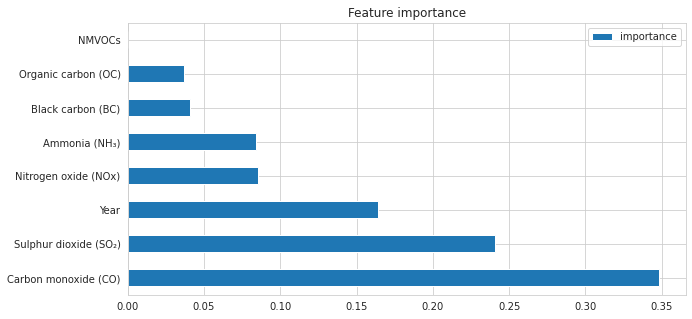

In [136]:
feature_importances = pd.DataFrame(germany_regressor.feature_importances_,
                                      index = df_regression_x.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
feature_importances.plot(kind='barh', figsize=(10, 5), title='Feature importance')

### 5. Evaluation

In [137]:
# predict values
y_pred = germany_regressor.predict(X_test)

In [138]:
# visualize a simple decision tree
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

estimator = germany_regressor.estimators_[2]

export_graphviz(estimator, out_file='tree.dot',
                feature_names = df_regression_x.columns,
                class_names = ['Temperature Change'],
                rounded = True, proportion = False,
                precision = 1, filled = True)
                
from subprocess import call
call(['dot', '-Tsvg', 'tree.dot', '-o', 'tree.svg', '-Gdpi=600'])

0

In [139]:
# rescale results and reshape to 2d array
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
X_test_rescaled = scaler.inverse_transform(X_test.reshape(-1, 1))

mse_germany = mean_squared_error(y_test, y_pred)

# add Temperature Change Prediction to X_test_original
X_test_original['Temperature Change Prediction'] = y_pred
X_test_original['Temperature Change'] = y_test_rescaled

print(X_test_original[['Year', 'Temperature Change', 'Temperature Change Prediction']])



      Year  Temperature Change  Temperature Change Prediction
3730  1961               0.990                      -0.147937
3735  1966               0.406                      -0.485437
3764  1995               1.301                       0.758571
3743  1974               0.318                       0.169804
3774  2005               1.015                       1.085500
3782  2013               0.571                       1.424400
3767  1998               1.146                       0.980771
3755  1986              -0.011                      -0.399208
3776  2007               2.080                       1.085500
3742  1973               0.188                       0.085492
3778  2009               1.270                       1.085500
3733  1964              -0.330                      -0.485437


In [168]:
print('Mean Squared Error Germany for testing data:', mse_germany)

Mean Squared Error Germany for testing data: 0.33113319300108873


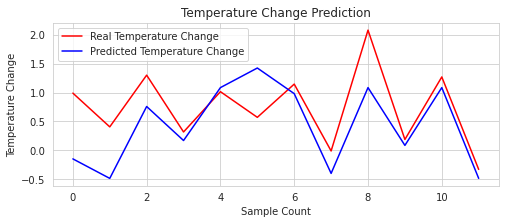

In [141]:
# plot results
plt.figure(figsize=(8, 3))
plt.plot(y_test_rescaled, color = 'red', label = 'Real Temperature Change')
plt.plot(y_pred, color = 'blue', label = 'Predicted Temperature Change')
plt.title('Temperature Change Prediction')
plt.xlabel('Sample Count')
plt.ylabel('Temperature Change')
plt.legend()
plt.show()

In [142]:
def model_by_country(df):
    df_regression_x = df[['Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂)', 'Carbon monoxide (CO)','Organic carbon (OC)', 'NMVOCs', 'Black carbon (BC)', 'Ammonia (NH₃)', 'Year']]
    df_regression_y = df[['Temperature Change']]
    X_train, X_test, y_train, y_test = train_test_split(df_regression_x, df_regression_y, test_size=0.2, random_state=42, shuffle=True)
    
    regressor = RandomForestRegressor(n_estimators=4, min_samples_split=2, min_samples_leaf=4, max_features="sqrt", max_depth=10, bootstrap=False)
    return regressor.fit(X_train, y_train.values.ravel())
    

df_model_by_country = df_regression_all.groupby(['Entity']).apply(model_by_country)
df_model_by_country = df_model_by_country.reset_index()
df_model_by_country = df_model_by_country.rename(columns={0: 'Temperature Change Model'})

In [143]:
results_2019 = []

for index, row in df_evaluation_all.iterrows():
    row_x = [row['Nitrogen oxide (NOx)'], row['Sulphur dioxide (SO₂)'], row['Carbon monoxide (CO)'], row['Organic carbon (OC)'], row['NMVOCs'], row['Black carbon (BC)'], row['Ammonia (NH₃)'], row['Year']]
    row_y = row['Temperature Change']
    model_country = df_model_by_country[(df_model_by_country['Entity']==row['Entity'])]
    prediction = model_country.iloc[0]["Temperature Change Model"].predict([row_x])
    mse = mean_squared_error([row_y], prediction)
    results_2019.append([row['Entity'], row['Year'], prediction[0], row_y, mse])


# results_2019 to dataframe
df_results_2019 = pd.DataFrame(results_2019, columns=['Entity', 'Year', 'Prediction', 'Real', 'Mean Squared Error'])


In [144]:
# df_results_2019 avg for Mean Squared Error
print("MSE across all countries for 2019:",df_results_2019['Mean Squared Error'].mean())

MSE across all countries for 2019: 0.13030039903977578


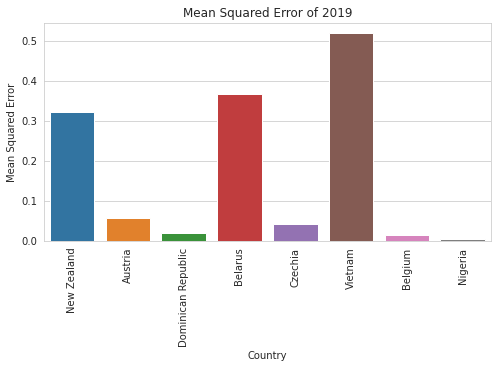

In [180]:
# plot results of 2019
plt.figure(figsize=(8, 4))
sn.set_style("whitegrid")
sn.barplot(x="Entity", y="Mean Squared Error", data=df_results_2019.sample(8))
plt.xticks(rotation=90)
plt.title('Mean Squared Error of 2019')
plt.xlabel('Country')
plt.ylabel('Mean Squared Error')
plt.show()

So what does this result mean for our original question "We see that the original question "Does the air pollution of a country have a direct influence on the annual average temperature?" ? 

We can see that it is possible for some countries better for others worse to use the emission values of the current year to predict the temperature change of the country. That means emissions or air pollution can or have a effect on our climate/temperature.

### 6. Deployment

Now we would like to make our country based prediction models available for scientist. So that they can use measured emission values of their country to predict the temperature change for a year.

Therefore we will use flask a simple python web framework to make this possible. 

<cite>https://flask.palletsprojects.com/en/2.2.x/</cite>

In [146]:
df_model_by_country.to_pickle("./web_app/df_models_per_country.pkl")
df_prepared.to_pickle("./web_app/df_emmissions_temperatures.pkl")